In [2]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Hands on Recognizing hand-written digits

Reference: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

This example shows how scikit-learn can be used to recognize images of
hand-written digits, from 0-9.

### Digits dataset

The digits dataset consists of 8x8
pixel images of digits. 

The ``images`` attribute of the dataset stores
8x8 arrays of grayscale values for each image. We will use these arrays to
visualize the first 4 images. 

The ``target`` attribute of the dataset stores
the digit each image represents and this is included in the title of the 4
plots below.

In [3]:
digits = datasets.load_digits()

print(digits.images.shape)
print(digits.target.shape)

(1797, 8, 8)
(1797,)


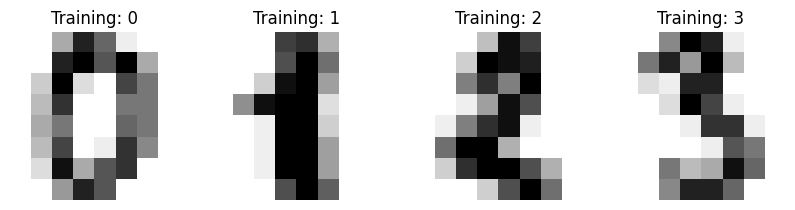

In [4]:

fig,axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

## Classification

To apply a classifier on this data, we need to flatten the images, turning
each 2-D array of grayscale values from shape ``(8, 8)`` into shape
``(64,)``. Subsequently, the entire dataset will be of shape
``(n_samples, n_features)``, where ``n_samples`` is the number of images and
``n_features`` is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support
vector classifier on the train samples. The fitted classifier can
subsequently be used to predict the value of the digit for the samples
in the test subset.



In [5]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

print(digits.images.shape)
print(data.shape)

(1797, 8, 8)
(1797, 64)


In [6]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

In [7]:
# Create a classifier: a support vector classifier
clf = KNeighborsClassifier(n_neighbors=3)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

Below we visualize the first 4 test samples and show their predicted
digit value in the title.



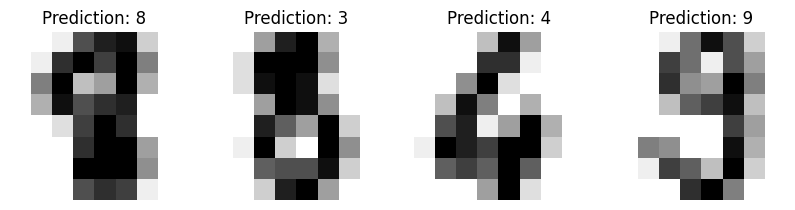

In [9]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [10]:
# calculate accuracy
accuracy = accuracy_score(y_test, predicted)
print("Model accuracy:", accuracy)

Model accuracy: 0.9632925472747497


The function `sklearn.metrics.classification_report` builds a text report showing
the main classification metrics.

In [11]:
print( metrics.classification_report(y_test, predicted) )

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.98      0.99      0.98        91
           2       0.99      0.94      0.96        86
           3       0.91      0.92      0.92        91
           4       0.99      0.93      0.96        92
           5       0.97      0.97      0.97        91
           6       0.99      1.00      0.99        91
           7       0.98      1.00      0.99        89
           8       0.94      0.95      0.95        88
           9       0.91      0.93      0.92        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899



We can also plot a `confusion matrix` of the
true digit values and the predicted digit values using function [sklearn.metrics.ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)

Text(0.5, 0.98, 'Confusion Matrix')

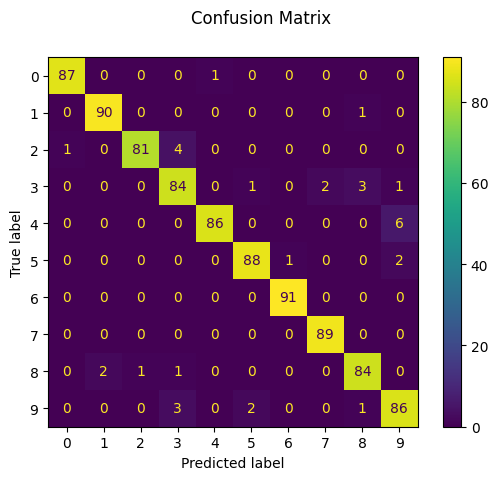

In [12]:
# from matplotlib import colormaps as cm
import matplotlib.cm as cm

# import matplotlib as mpl
# cmap = mpl.colormaps['viridis']

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
